### Sentiment Analysis on Twitter Dataset using Naive Bayes, RoBERTa and BERT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


In [3]:
data= pd.read_csv('twitter datasets.csv')
data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [4]:
# cleaning the data

data_cleaned = data.dropna()

label_mapping = {-1: 0, 0: 1, 1: 2}

data_cleaned['mapped_category'] = data_cleaned['category'].map(label_mapping)

labels = data_cleaned['mapped_category'].tolist()

data_cleaned

C:\Users\saury\AppData\Local\Temp\ipykernel_15500\3037335879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['mapped_category'] = data_cleaned['category'].map(label_mapping)


,clean_text,category,mapped_category
0,when modi promised “minimum government maximum...,-1.0,0
1,talk all the nonsense and continue all the dra...,0.0,1
2,what did just say vote for modi welcome bjp t...,1.0,2
3,asking his supporters prefix chowkidar their n...,1.0,2
4,answer who among these the most powerful world...,1.0,2
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,0
162976,dear rss terrorist payal gawar what about modi...,-1.0,0
162977,did you cover her interaction forum where she ...,0.0,1
162978,there big project came into india modi dream p...,0.0,1


In [5]:
data_cleaned['mapped_category'].value_counts()

mapped_category
2    72249
1    55211
0    35509
Name: count, dtype: int64

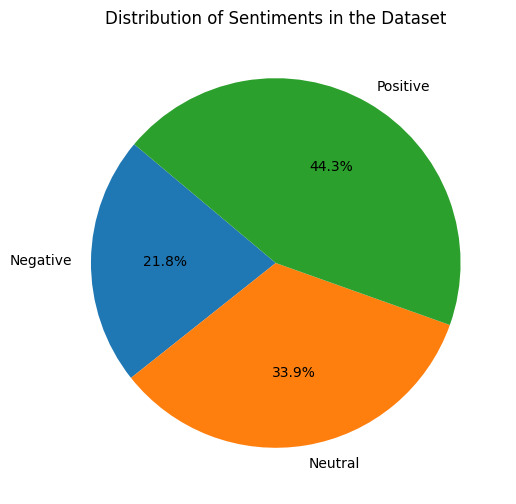

In [8]:
# Choosing a more professional color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Negative', 'Neutral', 'Positive']
counts = [35509, 55211, 72249]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, colors= colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments in the Dataset')
plt.show()



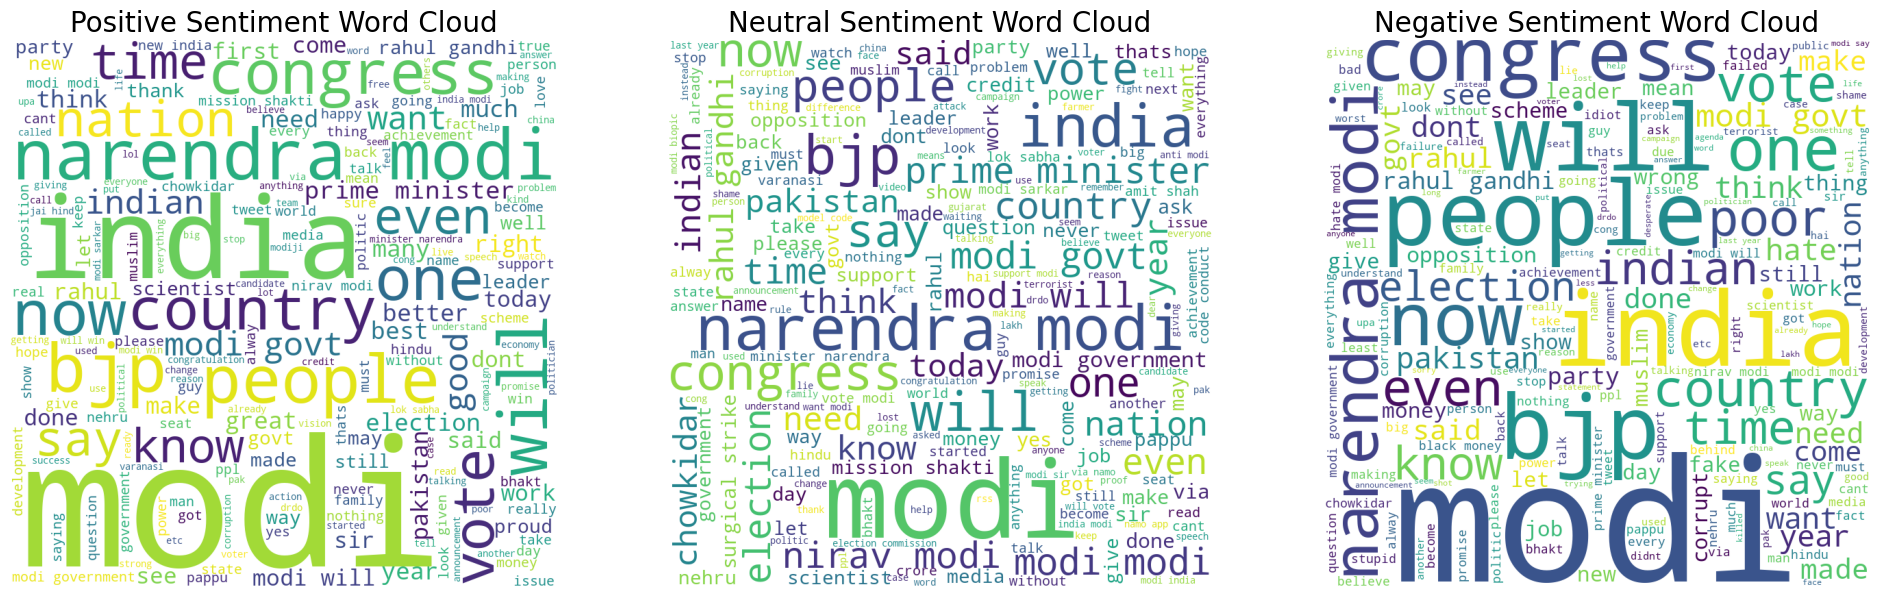

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filtering the dataset for each sentiment
positive_texts = data_cleaned[data_cleaned['mapped_category'] == 2]['clean_text']
neutral_texts = data_cleaned[data_cleaned['mapped_category'] == 1]['clean_text']
negative_texts = data_cleaned[data_cleaned['mapped_category'] == 0]['clean_text']

# Function for word cloud
def generate_word_cloud(texts):
    combined_text = " ".join(text for text in texts)
    return WordCloud(width=800, height=800, background_color='white', 
                     stopwords=STOPWORDS, min_font_size=10).generate(combined_text)

# Generating word clouds for each sentiment
wordcloud_positive = generate_word_cloud(positive_texts)
wordcloud_neutral = generate_word_cloud(neutral_texts)
wordcloud_negative = generate_word_cloud(negative_texts)

# Plotting
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive)
plt.title('Positive Sentiment Word Cloud', fontsize = 20)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neutral)
plt.title('Neutral Sentiment Word Cloud', fontsize = 20)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negative)
plt.title('Negative Sentiment Word Cloud', fontsize = 20)
plt.axis("off")

plt.show()



### Naive Bayes

In [12]:

X_cleaned = data_cleaned['clean_text']  # Features (tweets)
y_cleaned = data_cleaned['mapped_category']    # Labels (sentiment)

# training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Creating a Naive Bayes classifier 
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Training the model
model.fit(X_train_cleaned, y_train_cleaned)

# Predicting the sentiment on the test set
y_pred_cleaned = model.predict(X_test_cleaned)

# Evaluating the model
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
report_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)

print(accuracy_cleaned)
print(report_cleaned)

0.7469472909124378
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      7152
           1       0.92      0.60      0.73     11067
           2       0.68      0.92      0.78     14375

    accuracy                           0.75     32594
   macro avg       0.78      0.71      0.73     32594
weighted avg       0.78      0.75      0.74     32594



#### Interpretation: Classification Report:
Precision: Measures the accuracy of positive predictions. The model has precision scores of 75% for negative, 92% for neutral, and 68% for positive sentiments.

Recall: Measures the fraction of positives that were correctly identified. The model has recall scores of 62% for negative, 60% for neutral, and 92% for positive sentiments.

F1-Score: A weighted average of precision and recall. The model has F1-scores of 68% for negative, 73% for neutral, and 78% for positive sentiments.

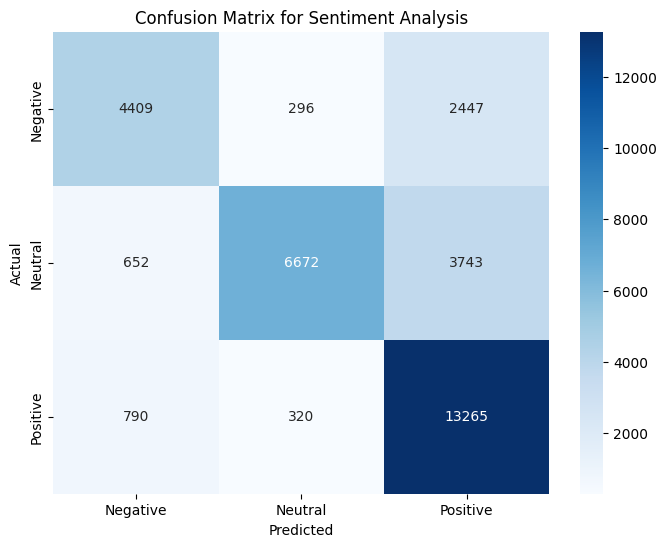

In [10]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test_cleaned, y_pred_cleaned)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix for Sentiment Analysis")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


### Roberta

In [13]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

C:\Users\saury\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# RoBERTa model and tokenizer
model_name = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=3)  # num_labels for positive, negative, neutral


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
# Dataset Preparation
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }



In [17]:
# Preparing the data
MAX_LEN = 128  # or any suitable max length
BATCH_SIZE = 16  # or any suitable batch size

# Load your dataset here
texts = data_cleaned['clean_text'].head(10000).tolist()
labels = data_cleaned['mapped_category'].head(10000).tolist()

# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create data loaders
train_data = SentimentDataset(train_texts, train_labels, tokenizer, MAX_LEN)
test_data = SentimentDataset(test_texts, test_labels, tokenizer, MAX_LEN)


# Training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5)

C:\Users\saury\miniconda3\Lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [18]:
# Train the model

from torch.utils.data import random_split

epochs = 10  

train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Initialising lists to store all predictions and actual labels
all_predictions = []
all_labels = []

# Training Loop
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    print('-' * 10)

    # Training phase
    model.train()
    total_train_loss = 0

    for step, batch in enumerate(train_loader):
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        model.zero_grad()
 
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
   
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()

    # the average loss over all batches in the training set
    avg_train_loss = total_train_loss / len(train_loader)
    print(f'Average training loss: {avg_train_loss}')

    # Validation phase
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in val_loader:
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

        loss = outputs.loss
        total_eval_loss += loss.item()

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # predictions for this batch
        predictions = np.argmax(logits, axis=1)

        # Update the total accuracy
        total_eval_accuracy += np.sum(predictions == label_ids)
        all_predictions.extend(predictions)
        all_labels.extend(label_ids)

# Calculate the average accuracy and loss over the validation set
    avg_val_accuracy = total_eval_accuracy / len(val_dataset)
    avg_val_loss = total_eval_loss / len(val_loader)

    print(f'Validation loss: {avg_val_loss}')
    print(f'Validation accuracy: {avg_val_accuracy}')



Epoch 1/10
----------
Average training loss: 0.8978521842509508
Validation loss: 0.6349286730587482
Validation accuracy: 0.753125
Epoch 2/10
----------
Average training loss: 0.540837602056563
Validation loss: 0.5122985456138849
Validation accuracy: 0.819375
Epoch 3/10
----------
Average training loss: 0.37550417382270096
Validation loss: 0.4039158460125327
Validation accuracy: 0.866875
Epoch 4/10
----------
Average training loss: 0.265397770665586
Validation loss: 0.382116582095623
Validation accuracy: 0.860625
Epoch 5/10
----------
Average training loss: 0.18559090675553308
Validation loss: 0.3782644856721163
Validation accuracy: 0.885
Epoch 6/10
----------
Average training loss: 0.13313899355358444
Validation loss: 0.4433152367686853
Validation accuracy: 0.875625
Epoch 7/10
----------
Average training loss: 0.10546966769034043
Validation loss: 0.451225214228034
Validation accuracy: 0.87875
Epoch 8/10
----------
Average training loss: 0.0824813666177215
Validation loss: 0.47775227634

In [19]:
# Classification report
report = classification_report(all_labels, all_predictions, digits=2)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3850
           1       0.88      0.87      0.87      5470
           2       0.87      0.89      0.88      6680

    accuracy                           0.86     16000
   macro avg       0.85      0.85      0.85     16000
weighted avg       0.86      0.86      0.86     16000



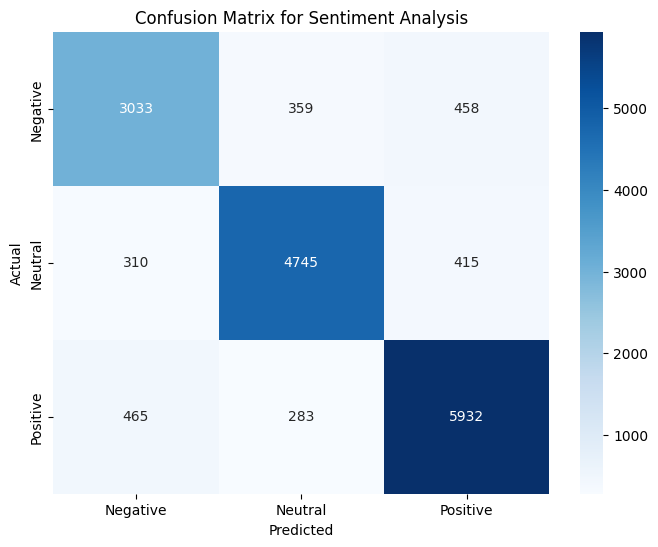

In [20]:
# Confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix for Sentiment Analysis")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### Comparison: 

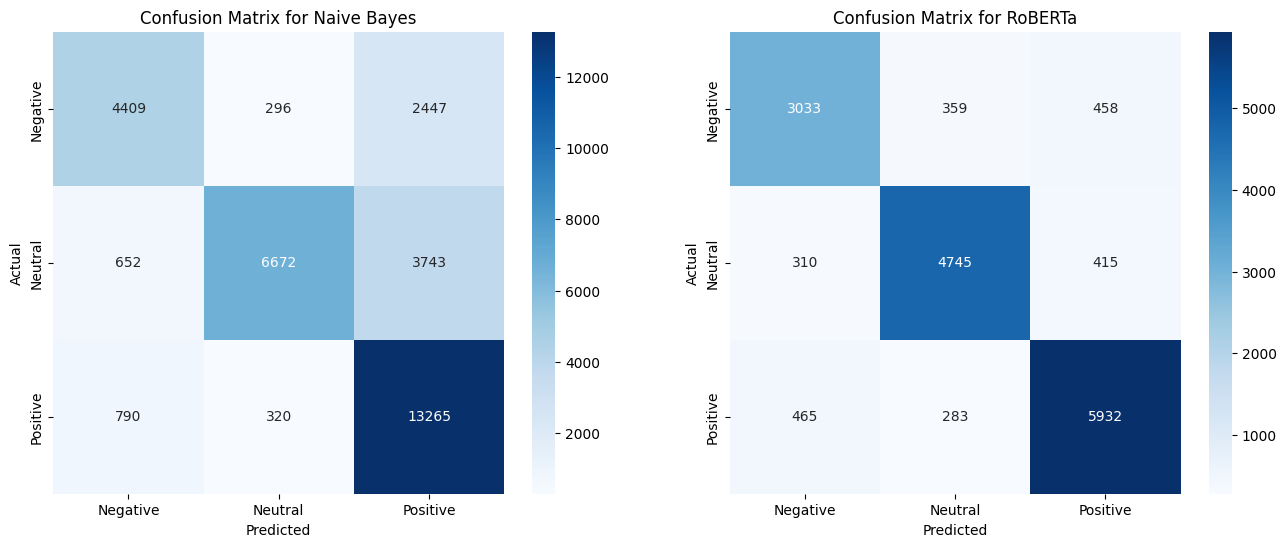

In [21]:
# For Naive Bayes
conf_matrix_nb = confusion_matrix(y_test_cleaned, y_pred_cleaned)
# For RoBERTa
conf_matrix_roberta = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(16, 6))

# Plotting Naive Bayes Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix for Naive Bayes")
plt.ylabel("Actual")
plt.xlabel("Predicted")

# Plotting RoBERTa Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_roberta, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix for RoBERTa")
plt.ylabel("Actual")
plt.xlabel("Predicted")

plt.show()